# Importing Library and Dataset

In [ ]:
from datetime import datetime
import numpy as np
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None

from IPython.display import display

import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('drive/MyDrive/Rakamin VIX Data Scientist/loan_data_2007_2014_clean.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (21,49) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,earliest_cr_line_date,months_since_earliest_cr_line,issue_d_dates,months_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,10.0,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgrade...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.0,NaN,NaN,NaN,1985-01-01,449.0,2011-12-01,126.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,0.0,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.co

# 1. Dependant Variable

In [ ]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [ ]:
df['loan_status'].value_counts()/df['loan_status'].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [ ]:
df['debtor_type'] = np.where(
    df['loan_status'].isin(
        ['Charged Off','Default','Late (31-120 days)','Does not meet the credit policy. Status:Charged Off']),
        0,1)

In [ ]:
df['debtor_type'].value_counts()

1    415317
0     50968
Name: debtor_type, dtype: int64

# 2. Seperate Label and Variable

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('debtor_type',axis=1)
y = df['debtor_type']

In [ ]:
df_inputs_prepr = X
df_targets_prepr = y

# 3. Discrete Variables

In [ ]:
df['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [ ]:
df1 = pd.concat([df_inputs_prepr['grade'],df_targets_prepr],axis=1)

In [ ]:
display(df1.head(2))

,grade,debtor_type
0,B,1
1,C,0


In [ ]:
df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].count()

,grade,debtor_type
0,A,74867
1,B,136929
2,C,125293
3,D,76888
4,E,35757
5,F,13229
6,G,3322


In [ ]:
df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].mean()

,grade,debtor_type
0,A,0.961305
1,B,0.921426
2,C,0.885197
3,D,0.845906
4,E,0.805241
5,F,0.758712
6,G,0.721854


In [ ]:
df1 = pd.concat([df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].count(),df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].mean()],axis=1)

In [ ]:
display(df1.head())

,grade,debtor_type,grade,debtor_type
0,A,74867,A,0.961305
1,B,136929,B,0.921426
2,C,125293,C,0.885197
3,D,76888,D,0.845906
4,E,35757,E,0.805241


In [ ]:
df1 = df1.iloc[:,[0,1,3]]

In [ ]:
df1.columns = [df1.columns.values[0],'n_obs','prop_good']
df1.head()

,grade,n_obs,prop_good
0,A,74867,0.961305
1,B,136929,0.921426
2,C,125293,0.885197
3,D,76888,0.845906
4,E,35757,0.805241


In [ ]:
df1['prop_n_obs'] = df1['n_obs']/df1['n_obs'].sum()
display(df1)

,grade,n_obs,prop_good,prop_n_obs
0,A,74867,0.961305,0.160561
1,B,136929,0.921426,0.293659
2,C,125293,0.885197,0.268705
3,D,76888,0.845906,0.164895
4,E,35757,0.805241,0.076685
5,F,13229,0.758712,0.028371
6,G,3322,0.721854,0.007124


In [ ]:
df1['n_good']= df1['prop_good'] * df1['n_obs']
df1['n_bad']= df1['n_obs']-df1['n_good'] #(1-df1['prop_good'])*df1['n_obs']
display(df1)

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad
0,A,74867,0.961305,0.160561,71970.0,2897.0
1,B,136929,0.921426,0.293659,126170.0,10759.0
2,C,125293,0.885197,0.268705,110909.0,14384.0
3,D,76888,0.845906,0.164895,65040.0,11848.0
4,E,35757,0.805241,0.076685,28793.0,6964.0
5,F,13229,0.758712,0.028371,10037.0,3192.0
6,G,3322,0.721854,0.007124,2398.0,924.0


In [ ]:
df1['prop_n_good'] = df1['n_good']/df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad']/df1['n_bad'].sum()
display(df1)

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad
0,A,74867,0.961305,0.160561,71970.0,2897.0,0.173289,0.056840
1,B,136929,0.921426,0.293659,126170.0,10759.0,0.303792,0.211093
2,C,125293,0.885197,0.268705,110909.0,14384.0,0.267047,0.282216
3,D,76888,0.845906,0.164895,65040.0,11848.0,0.156603,0.232460
4,E,35757,0.805241,0.076685,28793.0,6964.0,0.069328,0.136635
5,F,13229,0.758712,0.028371,10037.0,3192.0,0.024167,0.062628
6,G,3322,0.721854,0.007124,2398.0,924.0,0.005774,0.018129


In [ ]:
df1['WoE'] = np.log(df1['prop_n_good']/df1['prop_n_bad'])
display(df1)

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,A,74867,0.961305,0.160561,71970.0,2897.0,0.173289,0.056840,1.114730
1,B,136929,0.921426,0.293659,126170.0,10759.0,0.303792,0.211093,0.364043
2,C,125293,0.885197,0.268705,110909.0,14384.0,0.267047,0.282216,-0.055251
3,D,76888,0.845906,0.164895,65040.0,11848.0,0.156603,0.232460,-0.395001
4,E,35757,0.805241,0.076685,28793.0,6964.0,0.069328,0.136635,-0.678466
5,F,13229,0.758712,0.028371,10037.0,3192.0,0.024167,0.062628,-0.952214
6,G,3322,0.721854,0.007124,2398.0,924.0,0.005774,0.018129,-1.144166


In [ ]:
df1 = df1.sort_values('WoE')
df1 = df1.reset_index(drop=True)

display(df1)

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,G,3322,0.721854,0.007124,2398.0,924.0,0.005774,0.018129,-1.144166
1,F,13229,0.758712,0.028371,10037.0,3192.0,0.024167,0.062628,-0.952214
2,E,35757,0.805241,0.076685,28793.0,6964.0,0.069328,0.136635,-0.678466
3,D,76888,0.845906,0.164895,65040.0,11848.0,0.156603,0.232460,-0.395001
4,C,125293,0.885197,0.268705,110909.0,14384.0,0.267047,0.282216,-0.055251
5,B,136929,0.921426,0.293659,126170.0,10759.0,0.303792,0.211093,0.364043
6,A,74867,0.961305,0.160561,71970.0,2897.0,0.173289,0.056840,1.114730


In [ ]:
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WoE'] = df1['WoE'].diff().abs()

display(df1)

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,G,3322,0.721854,0.007124,2398.0,924.0,0.005774,0.018129,-1.144166,NaN,NaN
1,F,13229,0.758712,0.028371,10037.0,3192.0,0.024167,0.062628,-0.952214,0.036858,0.191952
2,E,35757,0.805241,0.076685,28793.0,6964.0,0.069328,0.136635,-0.678466,0.046529,0.273748
3,D,76888,0.845906,0.164895,65040.0,11848.0,0.156603,0.232460,-0.395001,0.040665,0.283465
4,C,125293,0.885197,0.268705,110909.0,14384.0,0.267047,0.282216,-0.055251,0.039291,0.339750
5,B,136929,0.921426,0.293659,126170.0,10759.0,0.303792,0.211093,0.364043,0.036229,0.419294
6,A,74867,0.961305,0.160561,71970.0,2897.0,0.173289,0.056840,1.114730,0.039878,0.750686


In [ ]:
df1['IV'] = ((df1['prop_n_good']-df1['prop_n_bad'])*df1['WoE'])
display(df1)
df1['IV'] = df1['IV'].sum()
display(df1)

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,3322,0.721854,0.007124,2398.0,924.0,0.005774,0.018129,-1.144166,NaN,NaN,0.014136
1,F,13229,0.758712,0.028371,10037.0,3192.0,0.024167,0.062628,-0.952214,0.036858,0.191952,0.036623
2,E,35757,0.805241,0.076685,28793.0,6964.0,0.069328,0.136635,-0.678466,0.046529,0.273748,0.045665
3,D,76888,0.845906,0.164895,65040.0,11848.0,0.156603,0.232460,-0.395001,0.040665,0.283465,0.029963
4,C,125293,0.885197,0.268705,110909.0,14384.0,0.267047,0.282216,-0.055251,0.039291,0.339750,0.000838
5,B,136929,0.921426,0.293659,126170.0,10759.0,0.303792,0.211093,0.364043,0.036229,0.419294,0.033746
6,A,74867,0.961305,0.160561,71970.0,2897.0,0.173289,0.056840,1.114730,0.039878,0.750686,0.129810


,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,3322,0.721854,0.007124,2398.0,924.0,0.005774,0.018129,-1.144166,NaN,NaN,0.290782
1,F,13229,0.758712,0.028371,10037.0,3192.0,0.024167,0.062628,-0.952214,0.036858,0.191952,0.290782
2,E,35757,0.805241,0.076685,28793.0,6964.0,0.069328,0.136635,-0.678466,0.046529,0.273748,0.290782
3,D,76888,0.845906,0.164895,65040.0,11848.0,0.156603,0.232460,-0.395001,0.040665,0.283465,0.290782
4,C,125293,0.885197,0.268705,110909.0,14384.0,0.267047,0.282216,-0.055251,0.039291,0.339750,0.290782
5,B,136929,0.921426,0.293659,126170.0,10759.0,0.303792,0.211093,0.364043,0.036229,0.419294,0.290782
6,A,74867,0.961305,0.160561,71970.0,2897.0,0.173289,0.056840,1.114730,0.039878,0.750686,0.290782


In [ ]:
#Creating Function to above example
def woe_discrete(df1,variable_name,df_target):
    df1 = pd.concat([df1[variable_name],df_target],axis=1)
    df1 = pd.concat([df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].count()
                     ,df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].mean()],axis=1)
    df1 = df1.iloc[:,[0,1,3]]
    df1.columns = [df1.columns.values[0],'n_obs','prop_good']
    
    df1['prop_n_obs'] = df1['n_obs']/df1['n_obs'].sum()
    df1['n_good']= df1['prop_good'] * df1['n_obs']
    df1['n_bad']= df1['n_obs']-df1['n_good'] #(1-df1['prop_good'])*df1['n_obs']

    df1['prop_n_good'] = df1['n_good']/df1['n_good'].sum()
    df1['prop_n_bad'] = df1['n_bad']/df1['n_bad'].sum()

    df1['WoE'] = np.log(df1['prop_n_good']/df1['prop_n_bad'])

    df1 = df1.sort_values('WoE')
    df1 = df1.reset_index(drop=True)

    df1['diff_prop_good'] = df1['prop_good'].diff().abs()
    df1['diff_WoE'] = df1['WoE'].diff().abs()

    df1['IV'] = ((df1['prop_n_good']-df1['prop_n_bad'])*df1['WoE'])    
    df1['IV'] = df1['IV'].sum()
    return df1

## 3.1 Grade

In [ ]:
woe_grade = woe_discrete(df_inputs_prepr,'grade',df_targets_prepr)
display(woe_grade)

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,3322,0.721854,0.007124,2398.0,924.0,0.005774,0.018129,-1.144166,NaN,NaN,0.290782
1,F,13229,0.758712,0.028371,10037.0,3192.0,0.024167,0.062628,-0.952214,0.036858,0.191952,0.290782
2,E,35757,0.805241,0.076685,28793.0,6964.0,0.069328,0.136635,-0.678466,0.046529,0.273748,0.290782
3,D,76888,0.845906,0.164895,65040.0,11848.0,0.156603,0.232460,-0.395001,0.040665,0.283465,0.290782
4,C,125293,0.885197,0.268705,110909.0,14384.0,0.267047,0.282216,-0.055251,0.039291,0.339750,0.290782
5,B,136929,0.921426,0.293659,126170.0,10759.0,0.303792,0.211093,0.364043,0.036229,0.419294,0.290782
6,A,74867,0.961305,0.160561,71970.0,2897.0,0.173289,0.056840,1.114730,0.039878,0.750686,0.290782


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def plot_woe(df,rotation_x_axis=0):
    x = np.array(df.iloc[:,0].apply(str))
    y = df['WoE']
    
    plt.figure(figsize=(18,6)) # Sets the graph size to width 18 x height 6.
    
    # Plots the datapoints with coordiantes variable x on the x-axis and variable y on the y-axis.
    plt.plot(x,y,marker='o',linestyle='--',color='g')
    plt.title("Weight of evidence by "+df.columns[0])
    plt.xlabel(df.columns[0]+" categories")  # Names the x-axis with the name of the column with index 0.
    plt.ylabel("WoE") # Names the y-axis 'Weight of Evidence'.
    
    # Rotates the labels of the x-axis a predefined number of degrees.
    plt.xticks(rotation = rotation_x_axis)    
    
    plt.show()

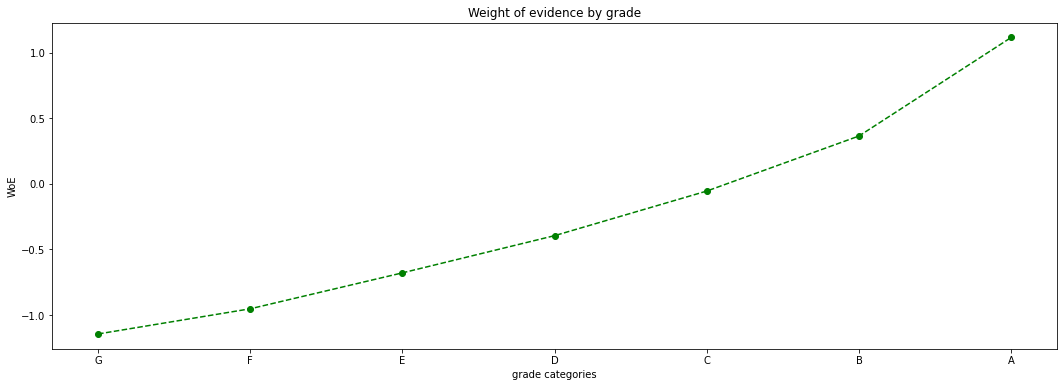

In [ ]:
plot_woe(woe_grade)

## 3.2 Home Ownership



In [ ]:
dummy_variables     = []
reference_variables = []

In [ ]:
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)

display(df_temp)

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,OTHER,182,0.791209,0.000390,144.0,38.0,0.000347,0.000746,-0.765617,NaN,NaN,inf
1,NONE,50,0.840000,0.000107,42.0,8.0,0.000101,0.000157,-0.439616,0.048791,0.326001,inf
2,RENT,188473,0.873897,0.404201,164706.0,23767.0,0.396579,0.466312,-0.161980,0.033897,0.277636,inf
3,OWN,41704,0.891737,0.089439,37189.0,4515.0,0.089544,0.088585,0.010764,0.017840,0.172744,inf
4,MORTGAGE,235875,0.904017,0.505860,213235.0,22640.0,0.513427,0.444200,0.144832,0.012280,0.134069,inf
5,ANY,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,0.095983,inf,inf


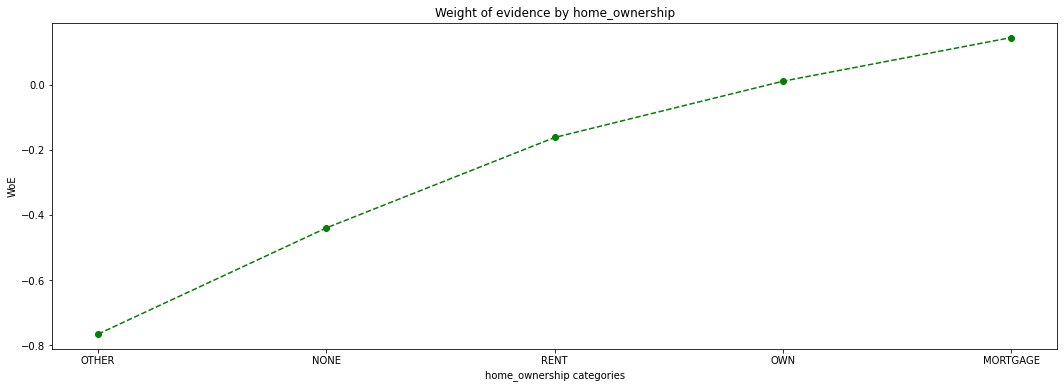

In [ ]:
plot_woe(df_temp)

In [ ]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER'],
                                                      df_inputs_prepr['home_ownership:NONE'],df_inputs_prepr['home_ownership:ANY']])

In [ ]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'].value_counts()

0    277579
1    188706
Name: home_ownership:RENT_OTHER_NONE_ANY, dtype: int64

## 3.3 Address State

In [ ]:
df_inputs_prepr['addr_state'].unique()

array(['AZ', 'GA', 'IL', 'CA', 'OR', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT',
       'FL', 'NY', 'PA', 'MN', 'NJ', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'CO', 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI',
       'DC', 'SD', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME'], dtype=object)

In [ ]:
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
display(df_temp)

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NE,14,0.428571,0.000030,6.0,8.0,0.000014,0.000157,-2.385526,NaN,NaN,inf
1,IA,14,0.785714,0.000030,11.0,3.0,0.000026,0.000059,-0.798561,3.571429e-01,1.586965,inf
2,NV,6519,0.862862,0.013981,5625.0,894.0,0.013544,0.017540,-0.258574,7.714812e-02,0.539987,inf
3,HI,2487,0.873743,0.005334,2173.0,314.0,0.005232,0.006161,-0.163373,1.088106e-02,0.095201,inf
4,FL,31637,0.874640,0.067849,27671.0,3966.0,0.066626,0.077814,-0.155217,8.969866e-04,0.008156,inf
5,AL,5853,0.876474,0.012552,5130.0,723.0,0.012352,0.014185,-0.138392,1.833151e-03,0.016825,inf
6,NY,40242,0.883182,0.086303,35541.0,4701.0,0.085576,0.092234,-0.074932,6.708147e-03,0.063460,inf
7,LA,5489,0.883403,0.011772,4849.0,640.0,0.011675,0.012557,-0.072784,2.214196e-04,0.002148,inf
8,NM,2588,0.884467,0.005550,2289.0,299.0,0.005511,0.005866,-0.062417,1.063600e-03,0.010367,inf
9,OK,4117,0.884625,0.008829,3642.0,475.0,0.008769,0.009320,-0.060871,1.579570e-04,0.001547,inf


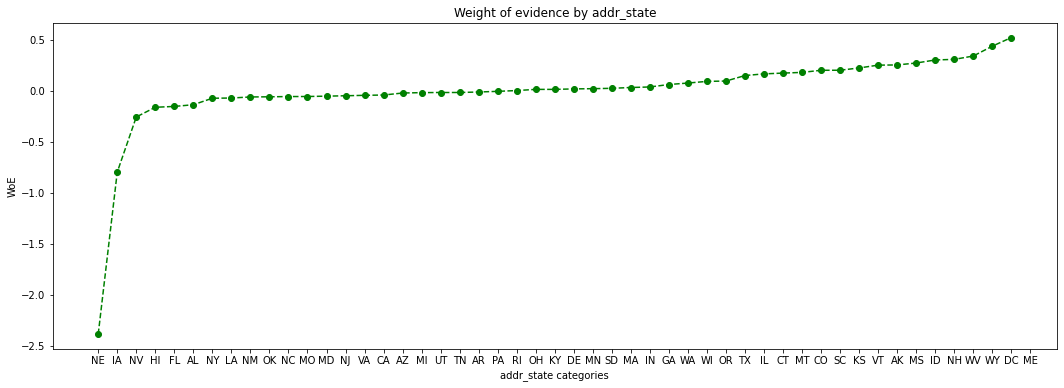

In [ ]:
plot_woe(df_temp)

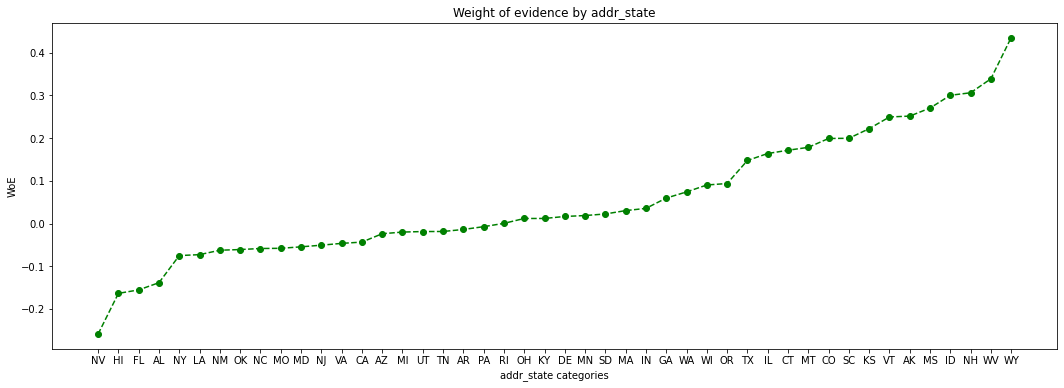

In [ ]:
#weight of evidence values except G , F , B , A.
plot_woe(df_temp.iloc[2: -2, : ])

In [ ]:
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

In [ ]:
# We create the following categories:
# 'ND''NE' 'IA' NV' 'FL' 'HI' 'AL'
# 'NM' 'VA'
# 'NY'
# 'OK' 'TN' 'MO' 'LA' 'MD' 'NC'
# 'CA'
# 'UT' 'KY' 'AZ' 'NJ'
# 'AR' 'MI' 'PA' 'OH' 'MN'
# 'RI' 'MA' 'DE' 'SD' 'IN'
# 'GA' 'WA' 'OR'
# 'WI' 'MT'
# 'TX'
# 'IL' 'CT'
# 'KS' 'SC' 'CO' 'VT' 'AK' 'MS'
# 'WV' 'NH' 'WY' 'DC' 'ME' 'ID'

# 'IA_NV_HI_ID_AL_FL' will be the reference category.

df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                              df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                              df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                          df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

## 3.4 Verification Status

In [ ]:
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
display(df_temp)

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,168055,0.872631,0.360413,146650.0,21405.0,0.353104,0.419969,-0.173420,NaN,NaN,0.020831
1,Source Verified,149993,0.895882,0.321677,134376.0,15617.0,0.323550,0.306408,0.054438,0.023251,0.227858,0.020831
2,Not Verified,148237,0.905921,0.317911,134291.0,13946.0,0.323346,0.273623,0.166972,0.010039,0.112535,0.020831


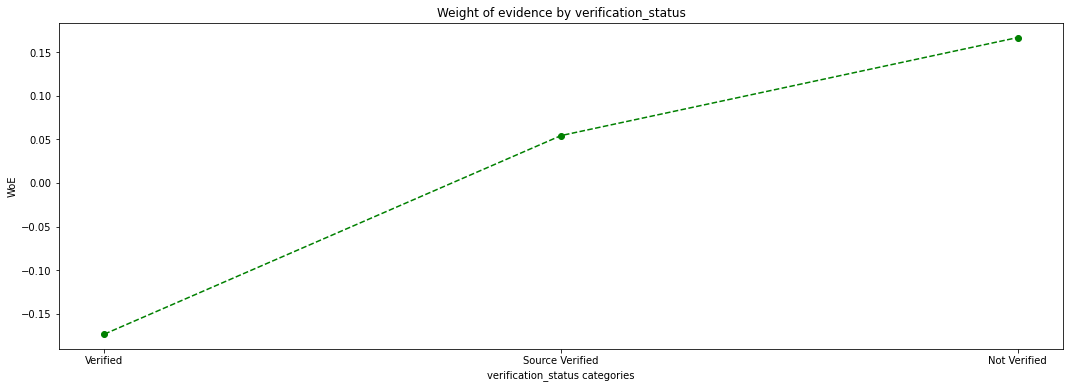

In [ ]:
plot_woe(df_temp)

## 3.5 Purpose

In [ ]:
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)

display(df_temp)

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,small_business,7013,0.784258,0.015040,5500.0,1513.0,0.013243,0.029685,-0.807190,NaN,NaN,0.03698
1,educational,422,0.791469,0.000905,334.0,88.0,0.000804,0.001727,-0.764040,0.007211,0.043151,0.03698
2,renewable_energy,351,0.846154,0.000753,297.0,54.0,0.000715,0.001059,-0.393096,0.054685,0.370944,0.03698
3,moving,2994,0.847361,0.006421,2537.0,457.0,0.006109,0.008966,-0.383790,0.001208,0.009306,0.03698
4,house,2269,0.859850,0.004866,1951.0,318.0,0.004698,0.006239,-0.283798,0.012489,0.099992,0.03698
5,other,23690,0.862009,0.050806,20421.0,3269.0,0.049170,0.064138,-0.265764,0.002159,0.018034,0.03698
6,medical,4602,0.866145,0.009870,3986.0,616.0,0.009597,0.012086,-0.230548,0.004136,0.035217,0.03698
7,wedding,2343,0.878361,0.005025,2058.0,285.0,0.004955,0.005592,-0.120843,0.012216,0.109704,0.03698
8,vacation,2487,0.882187,0.005334,2194.0,293.0,0.005283,0.005749,-0.084535,0.003826,0.036308,0.03698
9,debt_consolidation,274195,0.886690,0.588042,243126.0,31069.0,0.585399,0.609579,-0.040475,0.004503,0.044060,0.03698


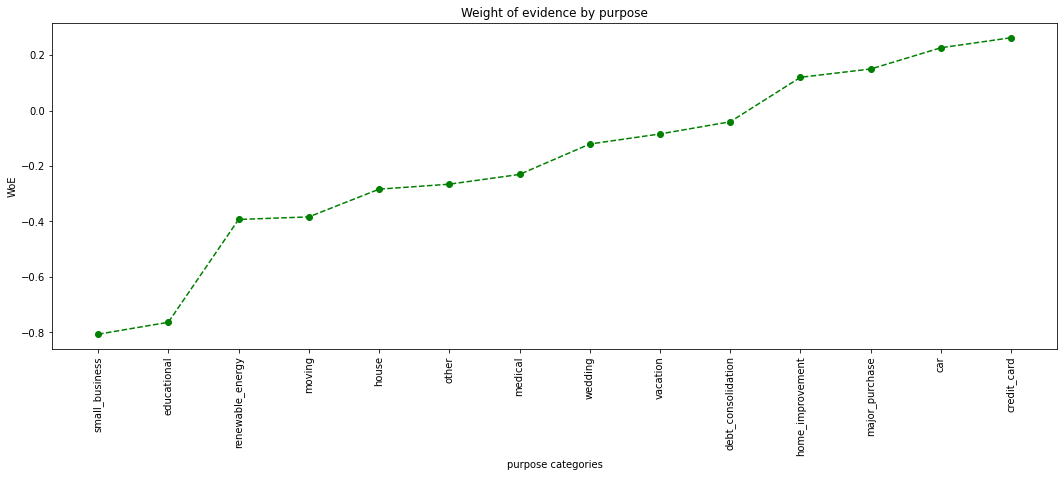

In [ ]:
plot_woe(df_temp, 90)

In [ ]:
# We combine 'educational', 'small_business', 'wedding', 'renewable_energy', 'moving', 'house' in one category: 'educ__sm_b__wedd__ren_en__mov__house'.
# We combine 'other', 'medical', 'vacation' in one category: 'oth__med__vacation'.
# We combine 'major_purchase', 'car', 'home_improvement' in one category: 'major_purch__car__home_impr'.
# We leave 'debt_consolidtion' in a separate category.
# We leave 'credit_card' in a separate category.
# 'educ__sm_b__wedd__ren_en__mov__house' will be the reference category.
df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                 df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                 df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                             df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement']])

## 3.6 Intial List Status

In [ ]:
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,303005,0.879692,0.649828,266551.0,36454.0,0.641801,0.715233,-0.108330,NaN,NaN,0.024801
1,w,163280,0.911110,0.350172,148766.0,14514.0,0.358199,0.284767,0.229417,0.031418,0.337746,0.024801


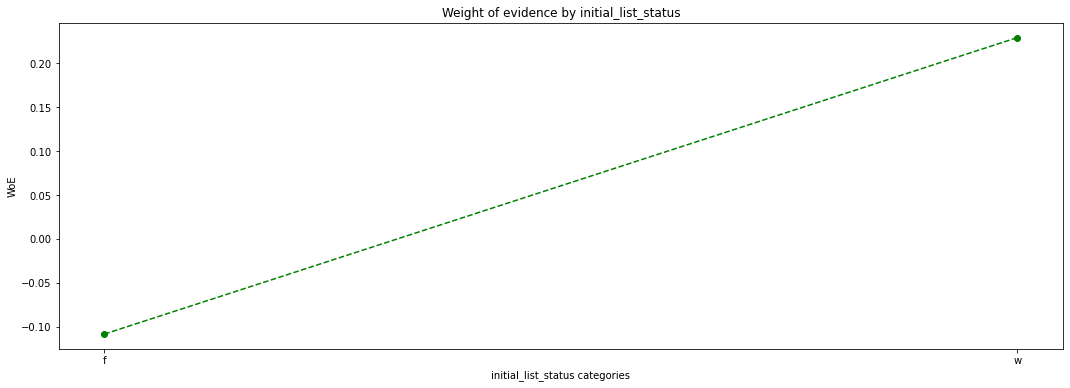

In [ ]:
plot_woe(df_temp)

# 4. Continuous Variables

In [ ]:
def woe_ordered_continuous(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

## 4.1 Term Months

In [ ]:
df_inputs_prepr['term_months'].unique()

array([36, 60])

In [ ]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'term_months', df_targets_prepr)
df_temp

,term_months,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36,337953,0.902915,0.724778,305143.0,32810.0,0.734723,0.643737,0.132203,NaN,NaN,0.03886
1,60,128332,0.858508,0.275222,110174.0,18158.0,0.265277,0.356263,-0.294894,0.044408,0.427097,0.03886


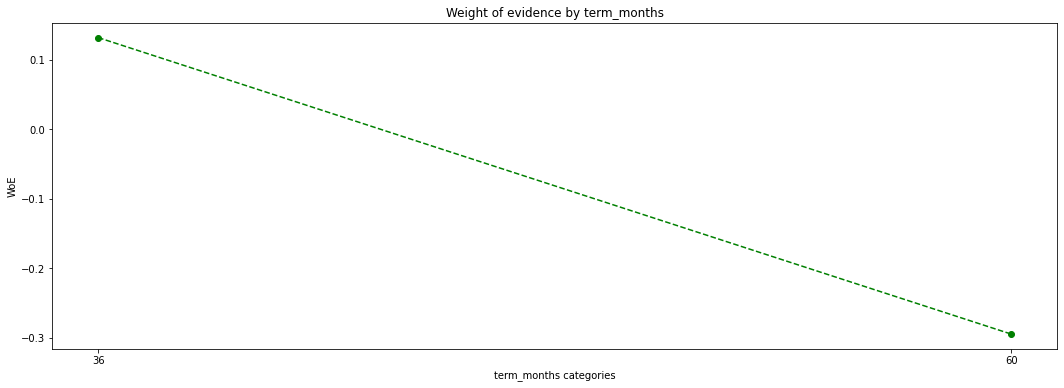

In [ ]:
plot_woe(df_temp)

In [ ]:
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_months'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_months'] == 60), 1, 0)

## 4.2 Employmen Length

In [ ]:
df_inputs_prepr['emp_length'].unique()

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7., nan])

In [ ]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'emp_length', df_targets_prepr)
df_temp

,emp_length,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,36265,0.881015,0.081444,31950.0,4315.0,0.080459,0.089556,-0.107115,NaN,NaN,0.004826
1,1.0,29622,0.888124,0.066525,26308.0,3314.0,0.066251,0.068781,-0.037473,0.007109,0.069642,0.004826
2,2.0,41373,0.890242,0.092915,36832.0,4541.0,0.092754,0.094247,-0.015970,0.002119,0.021503,0.004826
3,3.0,36596,0.890480,0.082187,32588.0,4008.0,0.082066,0.083185,-0.013538,0.000237,0.002432,0.004826
4,4.0,28023,0.890411,0.062934,24952.0,3071.0,0.062836,0.063737,-0.014239,0.000068,0.000701,0.004826
5,5.0,30774,0.885033,0.069112,27236.0,3538.0,0.068588,0.073430,-0.068212,0.005379,0.053973,0.004826
6,6.0,26112,0.882889,0.058642,23054.0,3058.0,0.058057,0.063468,-0.089112,0.002144,0.020900,0.004826
7,7.0,26180,0.888655,0.058795,23265.0,2915.0,0.058588,0.060500,-0.032110,0.005766,0.057002,0.004826
8,8.0,22395,0.889931,0.050295,19930.0,2465.0,0.050190,0.051160,-0.019156,0.001275,0.012954,0.004826
9,9.0,17888,0.887914,0.040173,15883.0,2005.0,0.039998,0.041613,-0.039585,0.002017,0.020429,0.004826


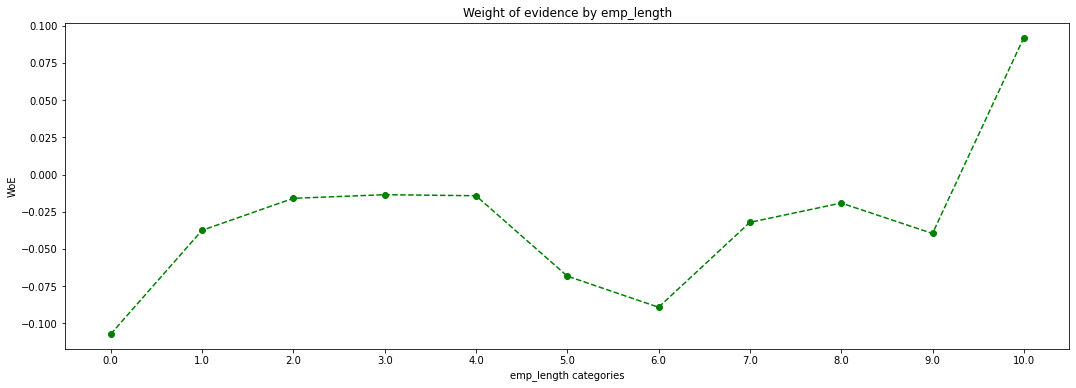

In [ ]:
plot_woe(df_temp)

In [ ]:
# We create the following categories: '0', '1', '2 - 4', '5 - 6', '7 - 9', '10'
# '0' will be the reference category
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length'].isin([1]), 1, 0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length'].isin(range(2, 5)), 1, 0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length'].isin(range(5, 7)), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length'].isin(range(7, 10)), 1, 0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length'].isin([10]), 1, 0)

## 4.3 Month Issue

In [ ]:
df_inputs_prepr['months_since_issue_d'].unique()

array([126., 127., 128., 129., 130., 131., 132., 133., 134., 135., 136.,
       137., 138., 139., 140., 141., 142., 143., 144., 145., 146., 147.,
       148., 149., 150., 151., 152., 153., 154., 155., 156., 157., 158.,
       159., 160., 161., 162., 163., 164., 165., 166., 167., 168., 169.,
       170., 171., 172., 173., 174., 175., 176., 177., 178., 179., 180.,
       102., 103., 104., 105., 106., 107., 108., 109., 110., 111., 112.,
       113., 114., 115., 116., 117., 118., 119., 120., 121., 122., 123.,
       124., 125.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101.])

In [ ]:
df_inputs_prepr['months_since_issue_d_factor'] = pd.cut(df_inputs_prepr['months_since_issue_d'], 50)

In [ ]:
df_inputs_prepr['months_since_issue_d_factor'].unique()

[(124.2, 126.0], (126.0, 127.8], (127.8, 129.6], (129.6, 131.4], (131.4, 133.2], ..., (91.8, 93.6], (93.6, 95.4], (95.4, 97.2], (97.2, 99.0], (99.0, 100.8]]
Length: 50
Categories (50, interval[float64, right]): [(89.91, 91.8] < (91.8, 93.6] < (93.6, 95.4] <
                                            (95.4, 97.2] ... (172.8, 174.6] < (174.6, 176.4] <
                                            (176.4, 178.2] < (178.2, 180.0]]

In [ ]:
display(df_inputs_prepr['months_since_issue_d_factor'])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'months_since_issue_d_factor', df_targets_prepr)
display(df_temp)

,months_since_issue_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(89.91, 91.8]",35361,0.942960,0.075836,33344.0,2017.0,0.080286,0.039574,0.707422,NaN,NaN,0.114799
1,"(91.8, 93.6]",49388,0.928809,0.105918,45872.0,3516.0,0.110451,0.068984,0.470687,0.014151,0.236736,0.114799
2,"(93.6, 95.4]",48120,0.917810,0.103199,44165.0,3955.0,0.106340,0.077598,0.315108,0.010999,0.155579,0.114799
3,"(95.4, 97.2]",36278,0.908705,0.077802,32966.0,3312.0,0.079376,0.064982,0.200080,0.009105,0.115028,0.114799
4,"(97.2, 99.0]",35584,0.902007,0.076314,32097.0,3487.0,0.077283,0.068415,0.121877,0.006698,0.078204,0.114799
5,"(99.0, 100.8]",15269,0.898487,0.032746,13719.0,1550.0,0.033033,0.030411,0.082683,0.003519,0.039194,0.114799
6,"(100.8, 102.6]",30648,0.897155,0.065728,27496.0,3152.0,0.066205,0.061843,0.068159,0.001332,0.014523,0.114799
7,"(102.6, 104.4]",28790,0.887843,0.061743,25561.0,3229.0,0.061546,0.063353,-0.028949,0.009312,0.097108,0.114799
8,"(104.4, 106.2]",25661,0.880207,0.055033,22587.0,3074.0,0.054385,0.060312,-0.103449,0.007636,0.074500,0.114799
9,"(106.2, 108.0]",22809,0.868298,0.048916,19805.0,3004.0,0.047686,0.058939,-0.211854,0.011910,0.108405,0.114799


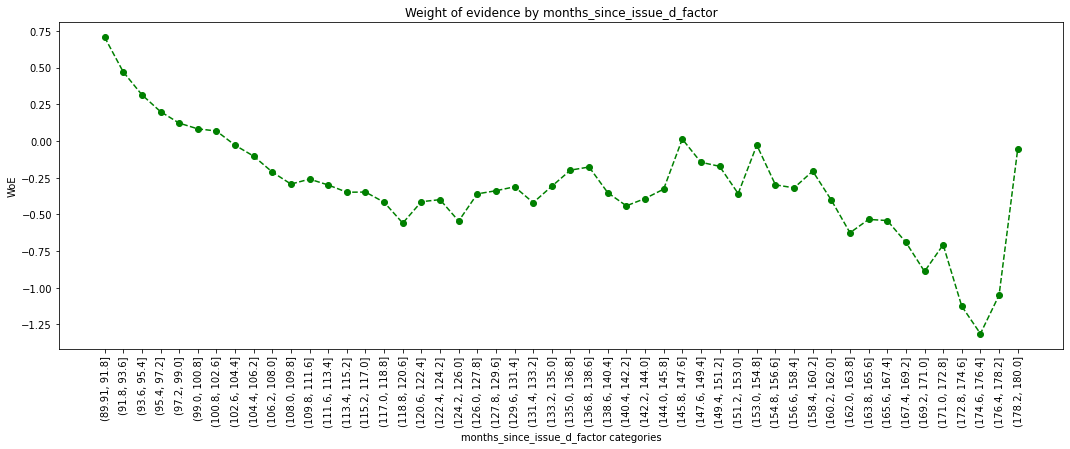

In [ ]:
plot_woe(df_temp, 90)

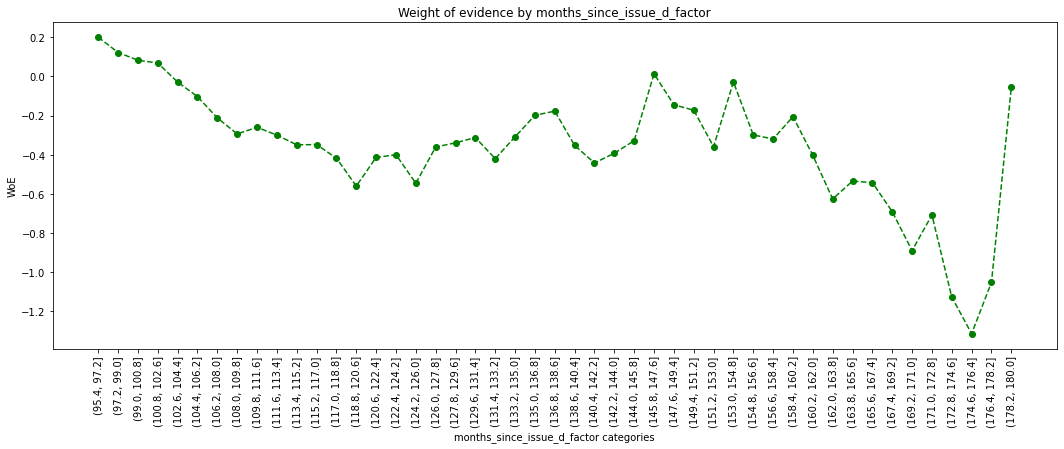

In [ ]:
plot_woe(df_temp.iloc[3: , : ], 90)

In [ ]:
# We create the following categories:
# < 38, 38 - 39, 40 - 41, 42 - 48, 49 - 52, 53 - 64, 65 - 84, > 84.
df_inputs_prepr['months_since_issue_d:<38']   = np.where(df_inputs_prepr['months_since_issue_d'].isin(range(38)), 1, 0)
df_inputs_prepr['months_since_issue_d:38-39'] = np.where(df_inputs_prepr['months_since_issue_d'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['months_since_issue_d:40-41'] = np.where(df_inputs_prepr['months_since_issue_d'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['months_since_issue_d:42-48'] = np.where(df_inputs_prepr['months_since_issue_d'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['months_since_issue_d:49-52'] = np.where(df_inputs_prepr['months_since_issue_d'].isin(range(49, 53)), 1, 0)
df_inputs_prepr['months_since_issue_d:53-64'] = np.where(df_inputs_prepr['months_since_issue_d'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['months_since_issue_d:65-84'] = np.where(df_inputs_prepr['months_since_issue_d'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['months_since_issue_d:>84']   = np.where(df_inputs_prepr['months_since_issue_d'].isin(range(85, int(df_inputs_prepr['months_since_issue_d'].max()))), 1, 0)

## 4.4 Interest Rate

In [ ]:
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)

In [ ]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
display(df_temp)

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.399, 5.833]",983,0.963377,0.002108,947.0,36.0,0.002280,0.000706,1.171936,NaN,NaN,0.347385
1,"(5.833, 6.246]",10545,0.980275,0.022615,10337.0,208.0,0.024889,0.004081,1.808103,0.016898,0.636167,0.347385
2,"(6.246, 6.658]",9800,0.971633,0.021017,9522.0,278.0,0.022927,0.005454,1.435895,0.008642,0.372208,0.347385
3,"(6.658, 7.071]",2293,0.968600,0.004918,2221.0,72.0,0.005348,0.001413,1.331203,0.003033,0.104692,0.347385
4,"(7.071, 7.484]",3947,0.977451,0.008465,3858.0,89.0,0.009289,0.001746,1.671424,0.008851,0.340221,0.347385
5,"(7.484, 7.897]",15826,0.962972,0.033941,15240.0,586.0,0.036695,0.011497,1.160515,0.014479,0.510909,0.347385
6,"(7.897, 8.31]",12116,0.949653,0.025984,11506.0,610.0,0.027704,0.011968,0.839321,0.013319,0.321194,0.347385
7,"(8.31, 8.722]",8274,0.965313,0.017745,7987.0,287.0,0.019231,0.005631,1.228244,0.015660,0.388923,0.347385
8,"(8.722, 9.135]",11923,0.938354,0.025570,11188.0,735.0,0.026938,0.014421,0.624882,0.026959,0.603362,0.347385
9,"(9.135, 9.548]",8271,0.966389,0.017738,7993.0,278.0,0.019246,0.005454,1.260856,0.028034,0.635974,0.347385


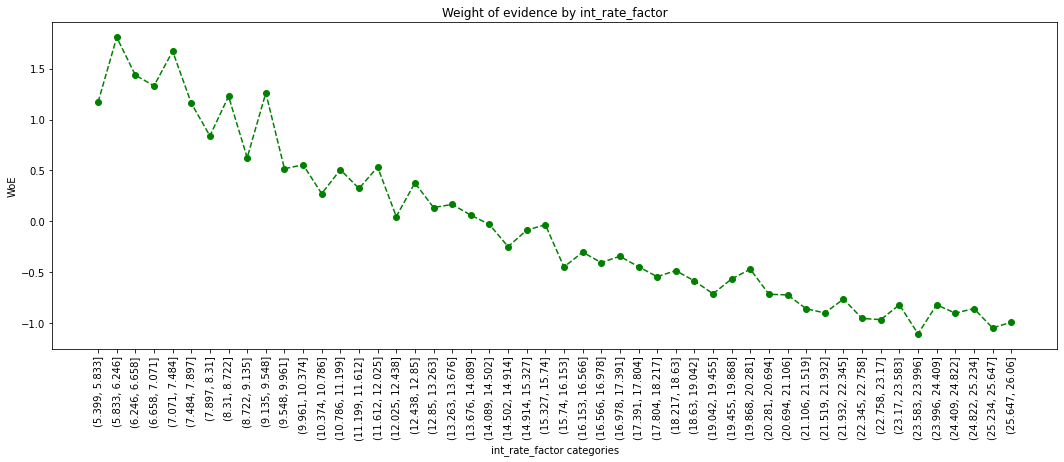

In [ ]:
plot_woe(df_temp, 90)

In [ ]:
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

## 4.5 Funded Amount

In [ ]:
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)

df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)

display(df_temp)

,funded_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(465.5, 1190.0]",1543,0.900194,0.003309,1389.0,154.0,0.003344,0.003022,0.101543,NaN,NaN,0.014153
1,"(1190.0, 1880.0]",3828,0.902299,0.008210,3454.0,374.0,0.008317,0.007338,0.125188,0.002104,0.023646,0.014153
2,"(1880.0, 2570.0]",7531,0.895100,0.016151,6741.0,790.0,0.016231,0.015500,0.046087,0.007199,0.079102,0.014153
3,"(2570.0, 3260.0]",9065,0.890017,0.019441,8068.0,997.0,0.019426,0.019561,-0.006934,0.005084,0.053020,0.014153
4,"(3260.0, 3950.0]",5996,0.891594,0.012859,5346.0,650.0,0.012872,0.012753,0.009287,0.001578,0.016221,0.014153
5,"(3950.0, 4640.0]",11321,0.889321,0.024279,10068.0,1253.0,0.024242,0.024584,-0.014023,0.002274,0.023310,0.014153
6,"(4640.0, 5330.0]",19860,0.893353,0.042592,17742.0,2118.0,0.042719,0.041555,0.027618,0.004033,0.041641,0.014153
7,"(5330.0, 6020.0]",21422,0.906171,0.045942,19412.0,2010.0,0.046740,0.039437,0.169913,0.012818,0.142294,0.014153
8,"(6020.0, 6710.0]",8632,0.886469,0.018512,7652.0,980.0,0.018424,0.019228,-0.042674,0.019702,0.212587,0.014153
9,"(6710.0, 7400.0]",14686,0.897113,0.031496,13175.0,1511.0,0.031723,0.029646,0.067705,0.010644,0.110380,0.014153


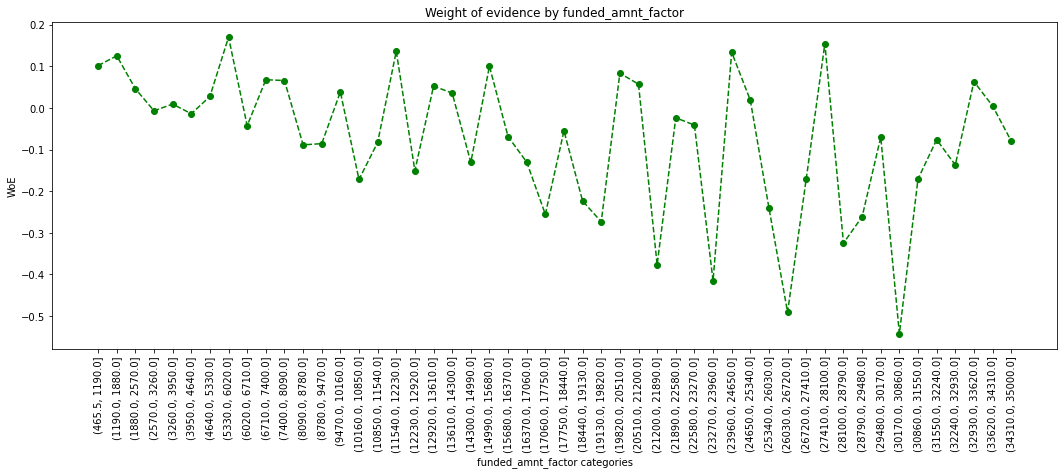

In [ ]:
plot_woe(df_temp, 90)

In [ ]:
#can't create dummy variables of funded_amnt because categories doesn't have nearly similar WoE 

## 4.6 Month Since Earliest Credit Line

In [ ]:
df_inputs_prepr['months_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['months_since_earliest_cr_line'], 50)


In [ ]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'months_since_earliest_cr_line_factor', df_targets_prepr)
display(df_temp)

,months_since_earliest_cr_line_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(126.486, 137.28]",1065,0.905164,0.002284,964.0,101.0,0.002321,0.001982,0.158130,NaN,NaN,0.016288
1,"(137.28, 147.56]",2276,0.889279,0.004881,2024.0,252.0,0.004874,0.004945,-0.014438,0.015885,0.172569,0.016288
2,"(147.56, 157.84]",2972,0.857672,0.006374,2549.0,423.0,0.006138,0.008300,-0.301756,0.031608,0.287318,0.016288
3,"(157.84, 168.12]",4969,0.869591,0.010657,4321.0,648.0,0.010405,0.012715,-0.200489,0.011920,0.101267,0.016288
4,"(168.12, 178.4]",8393,0.865841,0.018001,7267.0,1126.0,0.017499,0.022094,-0.233168,0.003751,0.032679,0.016288
5,"(178.4, 188.68]",11090,0.860234,0.023785,9540.0,1550.0,0.022972,0.030413,-0.280602,0.005606,0.047433,0.016288
6,"(188.68, 198.96]",13533,0.871278,0.029025,11791.0,1742.0,0.028392,0.034180,-0.185538,0.011043,0.095064,0.016288
7,"(198.96, 209.24]",15851,0.878052,0.033996,13918.0,1933.0,0.033514,0.037928,-0.123731,0.006774,0.061807,0.016288
8,"(209.24, 219.52]",18041,0.881603,0.038693,15905.0,2136.0,0.038298,0.041911,-0.090142,0.003551,0.033589,0.016288
9,"(219.52, 229.8]",20687,0.885097,0.044368,18310.0,2377.0,0.044090,0.046640,-0.056232,0.003494,0.033910,0.016288


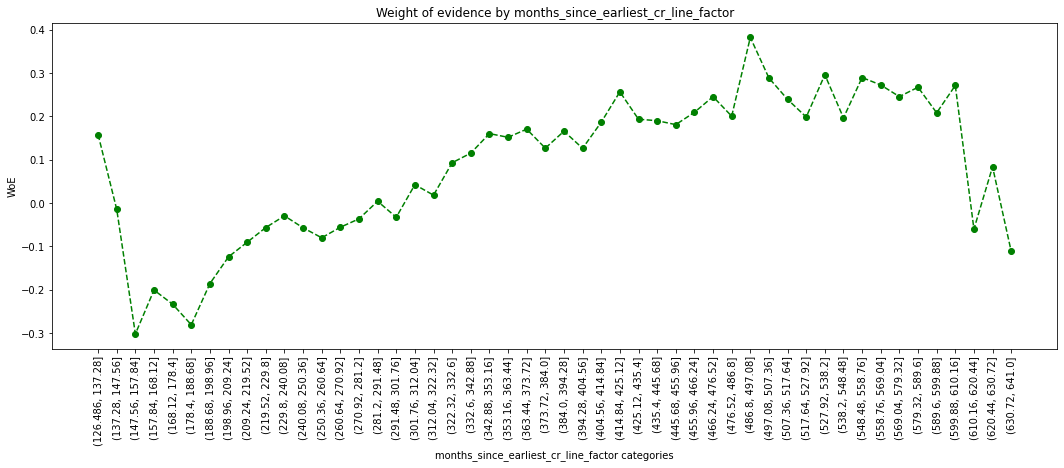

In [ ]:
plot_woe(df_temp, 90)

In [ ]:
# We create the following categories:
# < 140, # 141 - 164, # 165 - 247, # 248 - 270, # 271 - 352, # > 352
df_inputs_prepr['months_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['months_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['months_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['months_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['months_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['months_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['months_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['months_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['months_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['months_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['months_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['months_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['months_since_earliest_cr_line'].max()))), 1, 0)

## 4.7 Delinquency Past 2 years



In [ ]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
display(df_temp)

,delinq_2yrs,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,382954,0.890587,0.821338,341054.0,41900.0,0.821241,0.822133,-0.001085,NaN,NaN,inf
1,1.0,56224,0.892679,0.120586,50190.0,6034.0,0.120855,0.118395,0.020565,0.002092,0.021651,inf
2,2.0,16310,0.888228,0.034981,14487.0,1823.0,0.034884,0.035770,-0.025072,0.004451,0.045637,inf
3,3.0,5684,0.885292,0.012191,5032.0,652.0,0.012117,0.012793,-0.054312,0.002936,0.029240,inf
4,4.0,2378,0.896131,0.005100,2131.0,247.0,0.005131,0.004846,0.057118,0.010839,0.111430,inf
5,5.0,1236,0.888350,0.002651,1098.0,138.0,0.002644,0.002708,-0.023848,0.007782,0.080966,inf
6,6.0,629,0.893482,0.001349,562.0,67.0,0.001353,0.001315,0.028969,0.005132,0.052817,inf
7,7.0,346,0.872832,0.000742,302.0,44.0,0.000727,0.000863,-0.171603,0.020649,0.200572,inf
8,8.0,177,0.903955,0.000380,160.0,17.0,0.000385,0.000334,0.144120,0.031122,0.315723,inf
9,9.0,111,0.900901,0.000238,100.0,11.0,0.000241,0.000216,0.109435,0.003054,0.034686,inf


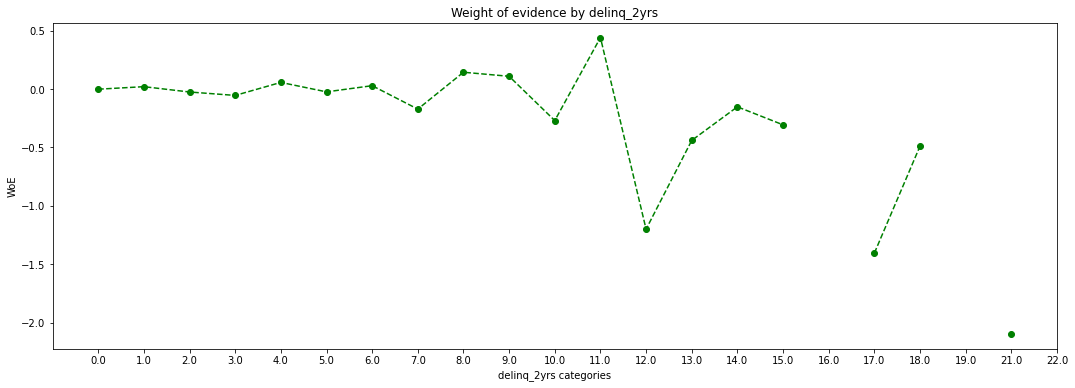

In [ ]:
plot_woe(df_temp)

In [ ]:
# Categories: 0, 1-3, >=4
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 4), 1, 0)

## 4.8 Inquiries Past 6 Months

In [ ]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)

display(df_temp)

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,inq_last_6mths,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,241498,0.908736,0.517952,219458.0,22040.0,0.528444,0.432454,0.200462,NaN,NaN,inf
1,1.0,130148,0.884439,0.279134,115108.0,15040.0,0.277174,0.295104,-0.062683,0.024297,0.263144,inf
2,2.0,57825,0.863606,0.124020,49938.0,7887.0,0.120248,0.154753,-0.252274,0.020834,0.189591,inf
3,3.0,25126,0.841001,0.053889,21131.0,3995.0,0.050882,0.078387,-0.432143,0.022604,0.179869,inf
4,4.0,7241,0.846982,0.015530,6133.0,1108.0,0.014768,0.021740,-0.386713,0.005981,0.045430,inf
5,5.0,2768,0.828396,0.005937,2293.0,475.0,0.005521,0.009320,-0.523539,0.018587,0.136826,inf
6,6.0,1188,0.783670,0.002548,931.0,257.0,0.002242,0.005043,-0.810657,0.044726,0.287118,inf
7,7.0,195,0.651282,0.000418,127.0,68.0,0.000306,0.001334,-1.473161,0.132388,0.662504,inf
8,8.0,122,0.622951,0.000262,76.0,46.0,0.000183,0.000903,-1.595748,0.028331,0.122587,inf
9,9.0,50,0.640000,0.000107,32.0,18.0,0.000077,0.000353,-1.522476,0.017049,0.073272,inf


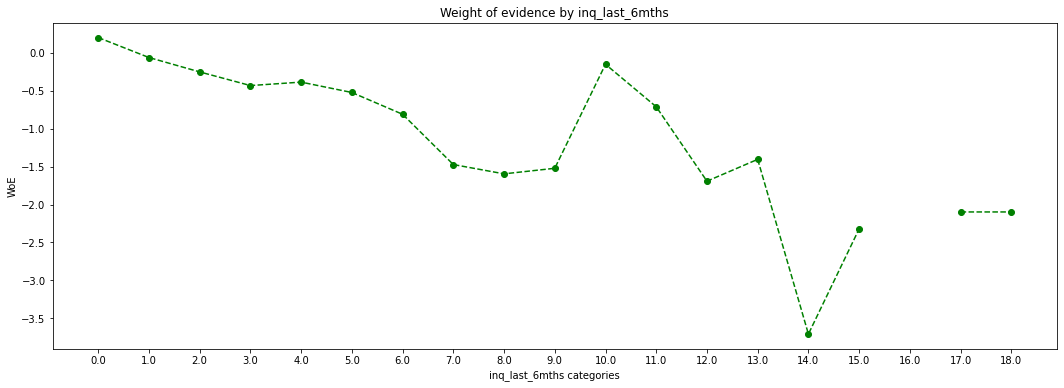

In [ ]:
plot_woe(df_temp)

In [ ]:
# Categories: 0, 1 - 2, 3 - 6, > 6
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

## 4.9 Open Credit Line 

In [ ]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)
display(df_temp)

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,open_acc,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,7,0.428571,0.000015,3.0,4.0,0.000007,0.000078,-2.385522,NaN,NaN,inf
1,1.0,142,0.873239,0.000305,124.0,18.0,0.000299,0.000353,-0.167931,0.444668,2.217592,inf
2,2.0,1790,0.844134,0.003839,1511.0,279.0,0.003638,0.005474,-0.408525,0.029105,0.240595,inf
3,3.0,5500,0.869455,0.011796,4782.0,718.0,0.011515,0.014088,-0.201696,0.025320,0.206829,inf
4,4.0,12588,0.891643,0.026998,11224.0,1364.0,0.027027,0.026763,0.009792,0.022188,0.211488,inf
5,5.0,21544,0.891292,0.046206,19202.0,2342.0,0.046237,0.045953,0.006169,0.000351,0.003624,inf
6,6.0,30837,0.892045,0.066137,27508.0,3329.0,0.066238,0.065319,0.013965,0.000753,0.007796,inf
7,7.0,37602,0.890618,0.080647,33489.0,4113.0,0.080640,0.080702,-0.000776,0.001428,0.014741,inf
8,8.0,41893,0.891509,0.089850,37348.0,4545.0,0.089932,0.089179,0.008411,0.000892,0.009187,inf
9,9.0,44019,0.889002,0.094410,39133.0,4886.0,0.094230,0.095870,-0.017248,0.002507,0.025660,inf


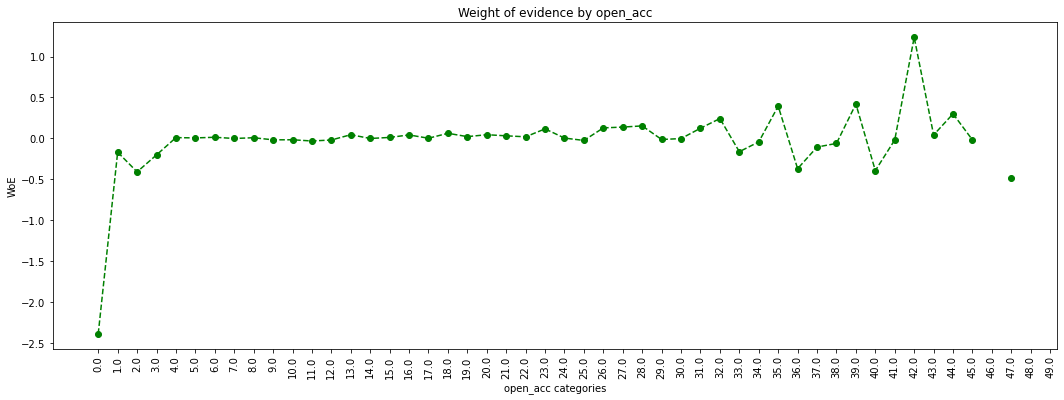

In [ ]:
plot_woe(df_temp, 90)

In [ ]:
# Categories: '0', '1-3', '4-12', '13-17', '18-22', '23-25', '26-30', '>30'
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

## 4.10 Public Record

In [ ]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
display(df_temp)

,pub_rec,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,404893,0.889788,0.868392,360269.0,44624.0,0.867510,0.875581,-0.009261,NaN,NaN,inf
1,1.0,53051,0.894969,0.113781,47479.0,5572.0,0.114327,0.109330,0.044693,0.005181,0.053954,inf
2,2.0,5624,0.903450,0.012062,5081.0,543.0,0.012235,0.010654,0.138314,0.008481,0.093621,inf
3,3.0,1611,0.916201,0.003455,1476.0,135.0,0.003554,0.002649,0.293976,0.012752,0.155662,inf
4,4.0,520,0.909615,0.001115,473.0,47.0,0.001139,0.000922,0.211107,0.006586,0.082868,inf
5,5.0,276,0.909420,0.000592,251.0,25.0,0.000604,0.000491,0.208737,0.000195,0.002371,inf
6,6.0,136,0.926471,0.000292,126.0,10.0,0.000303,0.000196,0.435856,0.017050,0.227120,inf
7,7.0,62,0.919355,0.000133,57.0,5.0,0.000137,0.000098,0.335773,0.007116,0.100083,inf
8,8.0,29,0.965517,0.000062,28.0,1.0,0.000067,0.000020,1.234364,0.046162,0.898591,inf
9,9.0,16,0.812500,0.000034,13.0,3.0,0.000031,0.000059,-0.631503,0.153017,1.865867,inf


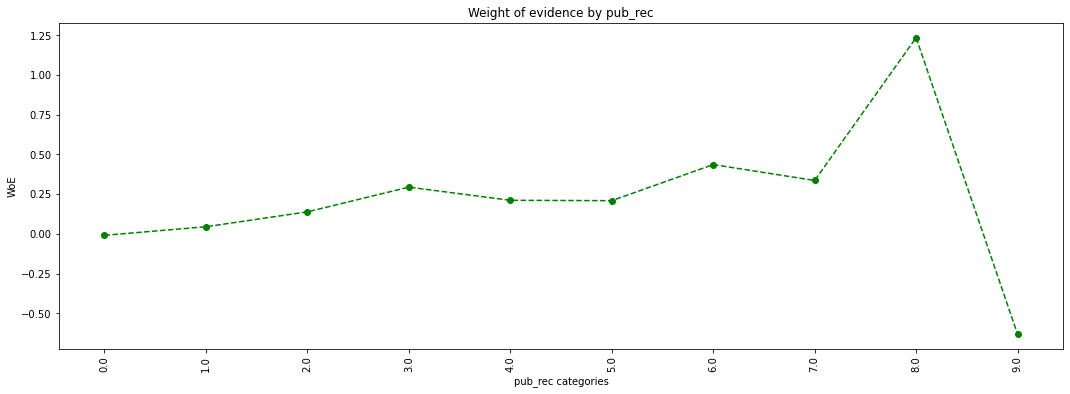

In [ ]:
plot_woe(df_temp, 90)

In [ ]:
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

## 4.11 Total Credit Line

In [ ]:
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
display(df_temp)

,total_acc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(0.845, 4.1]",2059,0.835357,0.004416,1720.0,339.0,0.004142,0.006652,-0.473761,NaN,NaN,inf
1,"(4.1, 7.2]",10849,0.867361,0.023268,9410.0,1439.0,0.022659,0.028235,-0.220016,0.032004,0.253745,inf
2,"(7.2, 10.3]",23089,0.875222,0.049520,20208.0,2881.0,0.048660,0.056529,-0.149899,0.007861,0.070117,inf
3,"(10.3, 13.4]",35337,0.880437,0.075789,31112.0,4225.0,0.074916,0.082900,-0.101266,0.005215,0.048633,inf
4,"(13.4, 16.5]",44537,0.884456,0.095520,39391.0,5146.0,0.094852,0.100971,-0.062523,0.004019,0.038743,inf
5,"(16.5, 19.6]",49609,0.887924,0.106399,44049.0,5560.0,0.106068,0.109094,-0.028136,0.003468,0.034387,inf
6,"(19.6, 22.7]",51188,0.890443,0.109785,45580.0,5608.0,0.109754,0.110036,-0.002565,0.002520,0.025570,inf
7,"(22.7, 25.8]",48821,0.890314,0.104709,43466.0,5355.0,0.104664,0.105072,-0.003892,0.000129,0.001327,inf
8,"(25.8, 28.9]",43514,0.897527,0.093326,39055.0,4459.0,0.094042,0.087491,0.072206,0.007214,0.076098,inf
9,"(28.9, 32.0]",48183,0.897516,0.103340,43245.0,4938.0,0.104132,0.096890,0.072081,0.000012,0.000125,inf


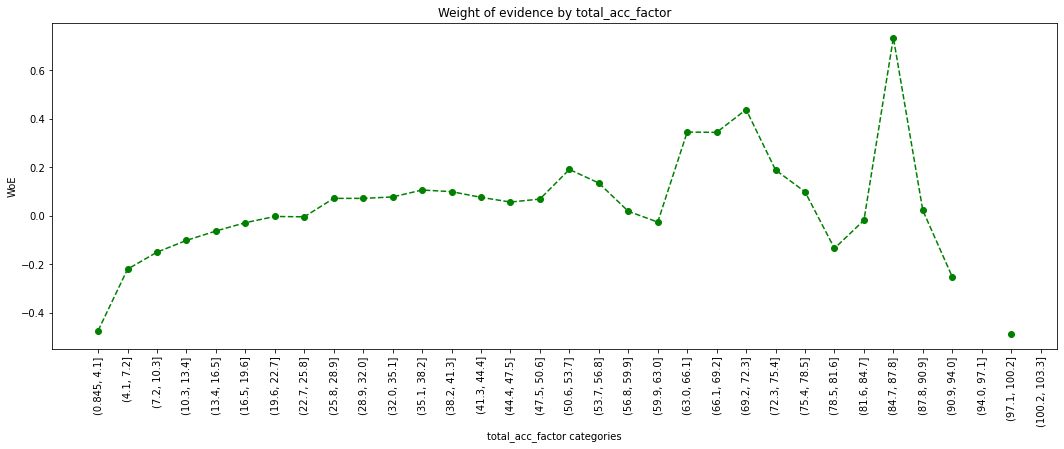

In [ ]:
plot_woe(df_temp, 90)

In [ ]:
# Categories: '<=27', '28-51', '>51'
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

## 4.12 Account Deliquency Now 

In [ ]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
display(df_temp)

,acc_now_delinq,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,464524,0.890684,0.996285,413744.0,50780.0,0.996275,0.996370,-0.000096,NaN,NaN,inf
1,1.0,1623,0.893407,0.003481,1450.0,173.0,0.003492,0.003394,0.028187,0.002723,0.028282,inf
2,2.0,92,0.902174,0.000197,83.0,9.0,0.000200,0.000177,0.123776,0.008767,0.095589,inf
3,3.0,11,0.818182,0.000024,9.0,2.0,0.000022,0.000039,-0.593763,0.083992,0.717539,inf
4,4.0,4,1.000000,0.000009,4.0,0.0,0.000010,0.000000,inf,0.181818,inf,inf
5,5.0,2,0.500000,0.000004,1.0,1.0,0.000002,0.000020,-2.097840,0.500000,inf,inf


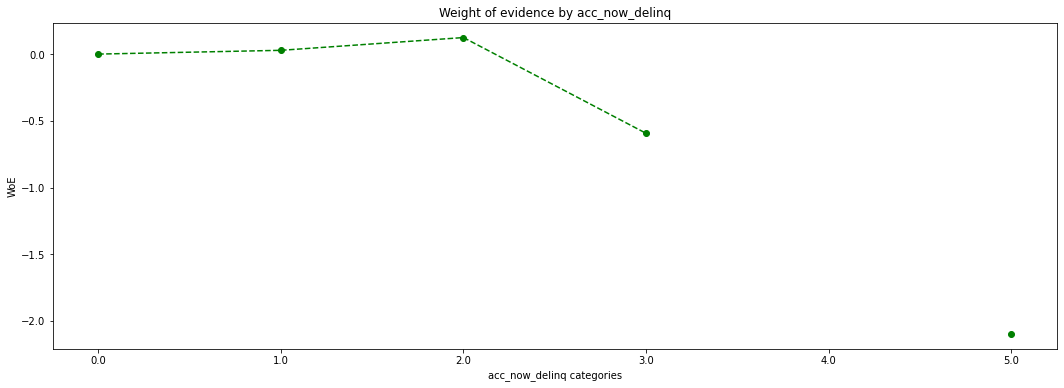

In [ ]:
plot_woe(df_temp)

In [ ]:
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

## 4.13 Credit Limit

In [ ]:
print("Total categories = ",len(df_inputs_prepr['total_rev_hi_lim'].unique()))

Total categories =  14933


In [ ]:
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
display(df_temp.head(10))

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-9999.999, 5000.0]",24313,0.865340,0.052142,21039.0,3274.0,0.050658,0.064236,-0.237479,NaN,NaN,inf
1,"(5000.0, 9999.999]",65938,0.875565,0.141411,57733.0,8205.0,0.139009,0.160983,-0.146759,0.010225,0.090720,inf
2,"(9999.999, 14999.998]",74357,0.880307,0.159467,65457.0,8900.0,0.157607,0.174619,-0.102502,0.004742,0.044257,inf
3,"(14999.998, 19999.998]",64259,0.878103,0.137811,56426.0,7833.0,0.135862,0.153685,-0.123260,0.002204,0.020758,inf
4,"(19999.998, 24999.997]",51995,0.886855,0.111509,46112.0,5883.0,0.111028,0.115425,-0.038838,0.008752,0.084422,inf
5,"(24999.997, 29999.997]",40181,0.889873,0.086173,35756.0,4425.0,0.086093,0.086819,-0.008396,0.003019,0.030441,inf
6,"(29999.997, 34999.996]",30615,0.896293,0.065657,27440.0,3175.0,0.066070,0.062294,0.058850,0.006419,0.067246,inf
7,"(34999.996, 39999.996]",24652,0.900698,0.052869,22204.0,2448.0,0.053463,0.048030,0.107157,0.004405,0.048307,inf
8,"(39999.996, 44999.996]",18392,0.913712,0.039444,16805.0,1587.0,0.040463,0.031137,0.261987,0.013015,0.154830,inf
9,"(44999.996, 49999.995]",14428,0.913779,0.030942,13184.0,1244.0,0.031744,0.024407,0.262828,0.000066,0.000841,inf


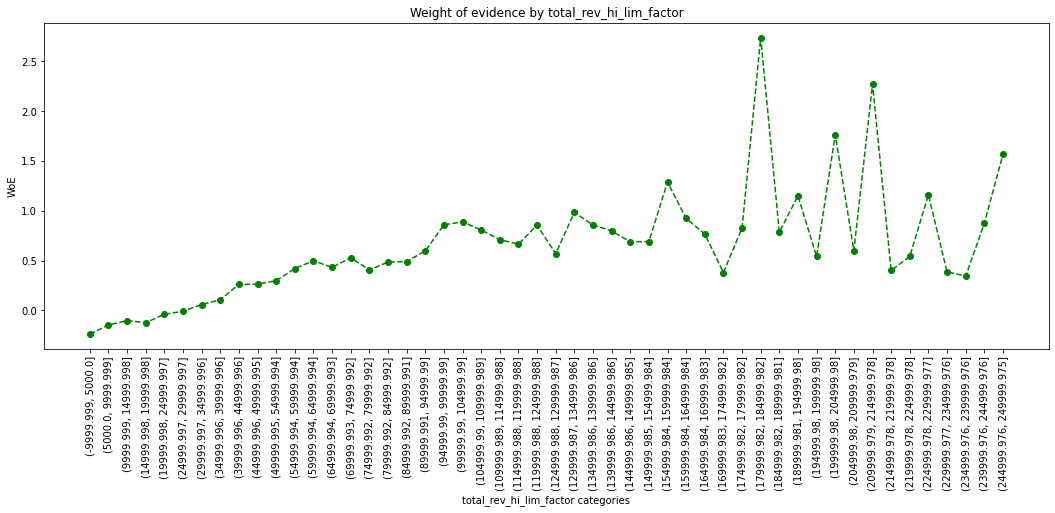

In [ ]:
plot_woe(df_temp.iloc[: 50, : ], 90)

In [ ]:
# Categories
# '<=5K', '5K-10K', '10K-20K', '20K-30K', '30K-40K', '40K-55K', '55K-95K', '>95K'
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

## 4.14 Installment

In [ ]:
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
display(df_temp)

,installment_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(14.276, 43.556]",2297,0.898999,0.004926,2065.0,232.0,0.004972,0.004552,0.088304,NaN,NaN,0.013297
1,"(43.556, 71.443]",6090,0.898851,0.013061,5474.0,616.0,0.013180,0.012086,0.086674,0.000148,0.001630,0.013297
2,"(71.443, 99.329]",8554,0.893617,0.018345,7644.0,910.0,0.018405,0.017854,0.030388,0.005234,0.056286,0.013297
3,"(99.329, 127.216]",11440,0.891434,0.024534,10198.0,1242.0,0.024555,0.024368,0.007625,0.002183,0.022763,0.013297
4,"(127.216, 155.102]",12648,0.894450,0.027125,11313.0,1335.0,0.027239,0.026193,0.039177,0.003016,0.031553,0.013297
5,"(155.102, 182.988]",20953,0.894908,0.044936,18751.0,2202.0,0.045149,0.043204,0.044037,0.000458,0.004860,0.013297
6,"(182.988, 210.875]",21342,0.904836,0.045770,19311.0,2031.0,0.046497,0.039849,0.154302,0.009928,0.110266,0.013297
7,"(210.875, 238.761]",18804,0.900606,0.040327,16935.0,1869.0,0.040776,0.036670,0.106135,0.004229,0.048168,0.013297
8,"(238.761, 266.648]",23532,0.901028,0.050467,21203.0,2329.0,0.051053,0.045695,0.110860,0.000422,0.004725,0.013297
9,"(266.648, 294.534]",25075,0.890728,0.053776,22335.0,2740.0,0.053778,0.053759,0.000353,0.010301,0.110507,0.013297


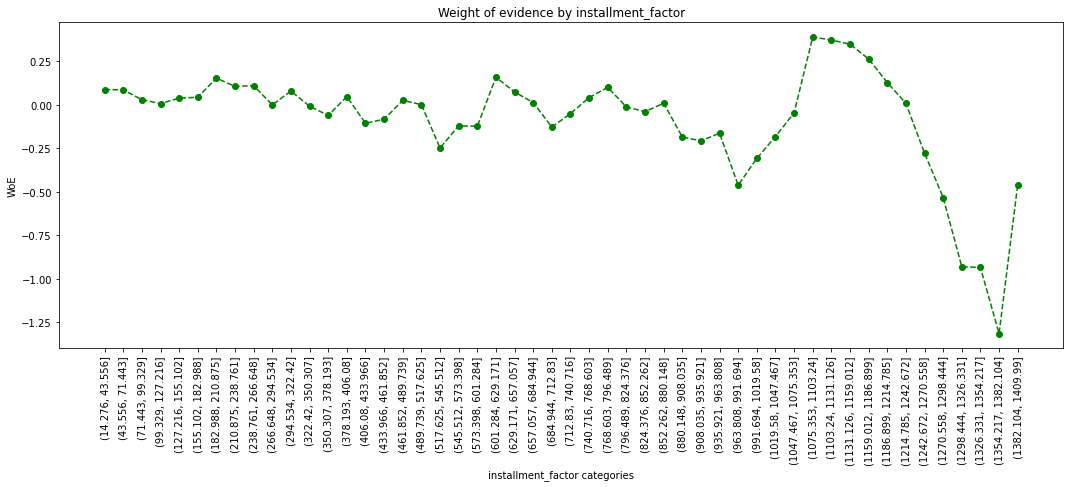

In [ ]:
plot_woe(df_temp, 90)

In [ ]:
# can't create dummy variables of installment because categories doesn't have nearly similar WoE 

## 4.15 Annual income

In [ ]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)

df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)

display(df_temp.head(10))

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-5602.104, 151858.08]",445843,0.888999,0.956160,396354.0,49489.0,0.954341,0.970982,-0.017287,NaN,NaN,inf
1,"(151858.08, 301820.16]",18425,0.926947,0.039514,17079.0,1346.0,0.041123,0.026409,0.442868,0.037948,0.460155,inf
2,"(301820.16, 451782.24]",1368,0.933480,0.002934,1277.0,91.0,0.003075,0.001785,0.543565,0.006532,0.100697,inf
3,"(451782.24, 601744.32]",372,0.940860,0.000798,350.0,22.0,0.000843,0.000432,0.669047,0.007381,0.125481,inf
4,"(601744.32, 751706.4]",115,0.904348,0.000247,104.0,11.0,0.000250,0.000216,0.148652,0.036512,0.520395,inf
5,"(751706.4, 901668.48]",73,0.904110,0.000157,66.0,7.0,0.000159,0.000137,0.145900,0.000238,0.002751,inf
6,"(901668.48, 1051630.56]",33,0.969697,0.000071,32.0,1.0,0.000077,0.000020,1.367892,0.065587,1.221991,inf
7,"(1051630.56, 1201592.64]",21,1.000000,0.000045,21.0,0.0,0.000051,0.000000,inf,0.030303,inf,inf
8,"(1201592.64, 1351554.72]",10,0.900000,0.000021,9.0,1.0,0.000022,0.000020,0.099380,0.100000,inf,inf
9,"(1351554.72, 1501516.8]",6,1.000000,0.000013,6.0,0.0,0.000014,0.000000,inf,0.100000,inf,inf


In [ ]:
# Initial examination shows that there are too few individuals with large income and too many with small income.
# Hence, we are going to have one category for more than 150K, and we are going to apply our approach to determine
# the categories of everyone with 140k or less.
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, : ]
#loan_data_temp = loan_data_temp.reset_index(drop = True)
#df_inputs_prepr_temp

In [ ]:
df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)

df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_prepr_temp.index])

display(df_temp.head(10))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(1757.896, 4658.08]",15,0.800000,0.000034,12.0,3.0,0.000031,0.000061,-0.689169,NaN,NaN,0.049225
1,"(4658.08, 7420.16]",46,0.782609,0.000105,36.0,10.0,0.000092,0.000204,-0.794529,0.017391,0.105361,0.049225
2,"(7420.16, 10182.24]",371,0.857143,0.000846,318.0,53.0,0.000816,0.001083,-0.283704,0.074534,0.510826,0.049225
3,"(10182.24, 12944.32]",675,0.816296,0.001538,551.0,124.0,0.001413,0.002535,-0.584010,0.040847,0.300306,0.049225
4,"(12944.32, 15706.4]",1517,0.834542,0.003458,1266.0,251.0,0.003248,0.005131,-0.457298,0.018246,0.126711,0.049225
5,"(15706.4, 18468.48]",1909,0.844421,0.004351,1612.0,297.0,0.004135,0.006071,-0.383964,0.009879,0.073334,0.049225
6,"(18468.48, 21230.56]",3678,0.851550,0.008383,3132.0,546.0,0.008034,0.011160,-0.328655,0.007129,0.055309,0.049225
7,"(21230.56, 23992.64]",3200,0.845625,0.007293,2706.0,494.0,0.006941,0.010098,-0.374772,0.005925,0.046117,0.049225
8,"(23992.64, 26754.72]",8833,0.851240,0.020132,7519.0,1314.0,0.019288,0.026859,-0.331106,0.005615,0.043666,0.049225
9,"(26754.72, 29516.8]",7008,0.856450,0.015973,6002.0,1006.0,0.015396,0.020563,-0.289352,0.005210,0.041753,0.049225


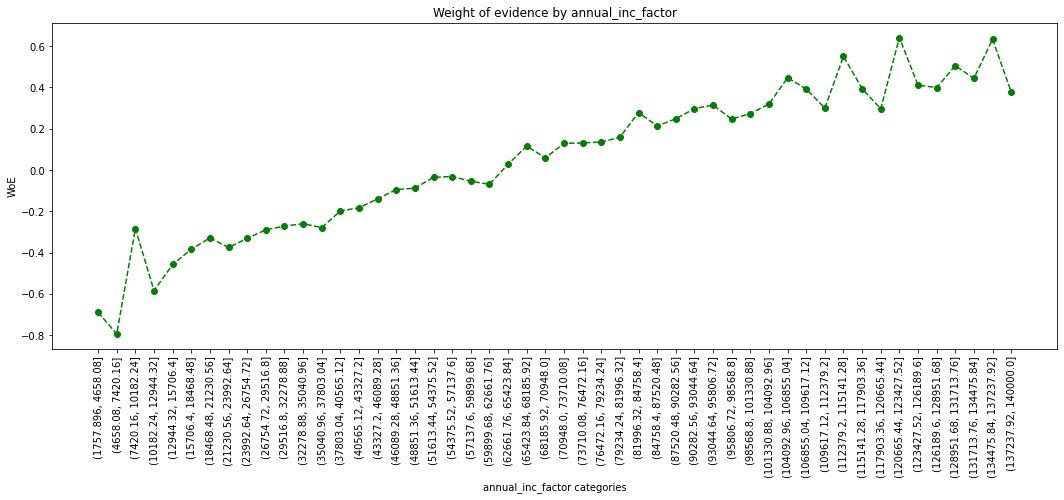

In [ ]:
plot_woe(df_temp, 90)

In [ ]:
# WoE is monotonically decreasing with income, so we split income in 10 equal categories, each with width of 15k.
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

## 4.16 Months Since Last Deliquency

In [ ]:
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
display(df_temp)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,mths_since_last_delinq_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.188, 3.76]",6625,0.870943,0.030681,5770.0,855.0,0.029951,0.036720,-0.203783,NaN,NaN,inf
1,"(3.76, 7.52]",13834,0.886801,0.064066,12268.0,1566.0,0.063680,0.067256,-0.054639,0.015857,0.149144,inf
2,"(7.52, 11.28]",16690,0.892331,0.077292,14893.0,1797.0,0.077306,0.077177,0.001664,0.005530,0.056303,inf
3,"(11.28, 15.04]",16547,0.888076,0.076630,14695.0,1852.0,0.076278,0.079540,-0.041867,0.004254,0.043532,inf
4,"(15.04, 18.8]",11645,0.894805,0.053929,10420.0,1225.0,0.054088,0.052611,0.027678,0.006728,0.069545,inf
5,"(18.8, 22.56]",14579,0.892997,0.067516,13019.0,1560.0,0.067579,0.066999,0.008615,0.001808,0.019062,inf
6,"(22.56, 26.32]",13603,0.896052,0.062996,12189.0,1414.0,0.063270,0.060728,0.041003,0.003056,0.032387,inf
7,"(26.32, 30.08]",13221,0.895318,0.061227,11837.0,1384.0,0.061443,0.059440,0.033144,0.000734,0.007859,inf
8,"(30.08, 33.84]",9442,0.899492,0.043726,8493.0,949.0,0.044085,0.040758,0.078480,0.004174,0.045336,inf
9,"(33.84, 37.6]",12168,0.898669,0.056351,10935.0,1233.0,0.056761,0.052955,0.069410,0.000823,0.009070,inf


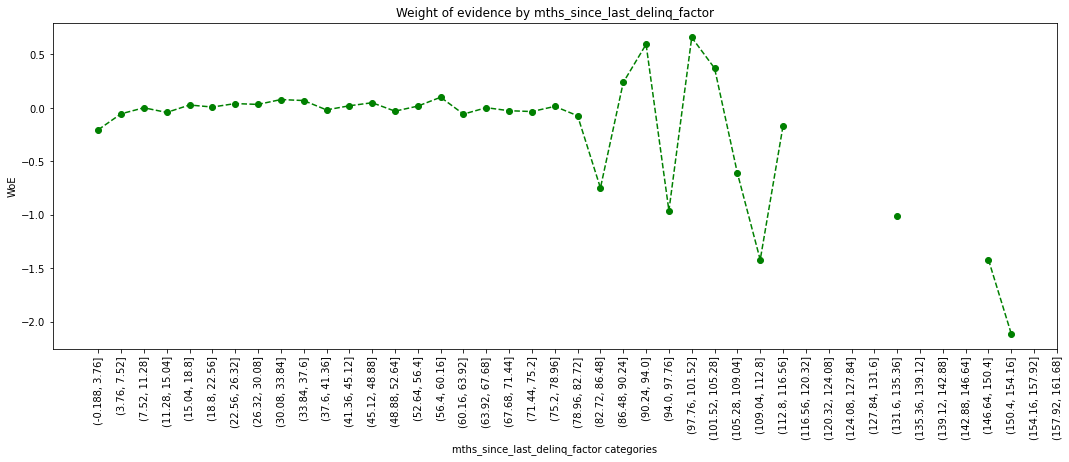

In [ ]:
plot_woe(df_temp, 90)

In [ ]:
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

## 4.17 Debt-to-Income

In [ ]:
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 100)

df_temp = woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)

display(df_temp)

,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.04, 0.4]",932,0.879828,0.001999,820.0,112.0,0.001974,0.002197,-0.107039,NaN,NaN,0.0285
1,"(0.4, 0.8]",992,0.912298,0.002127,905.0,87.0,0.002179,0.001707,0.244183,0.032470,0.351221,0.0285
2,"(0.8, 1.2]",1145,0.896070,0.002456,1026.0,119.0,0.002470,0.002335,0.056455,0.016229,0.187727,0.0285
3,"(1.2, 1.6]",1298,0.898305,0.002784,1166.0,132.0,0.002807,0.002590,0.080688,0.002235,0.024233,0.0285
4,"(1.6, 2.0]",1487,0.900471,0.003189,1339.0,148.0,0.003224,0.002904,0.104622,0.002166,0.023934,0.0285
5,"(2.0, 2.399]",1661,0.916315,0.003562,1522.0,139.0,0.003665,0.002727,0.295463,0.015845,0.190841,0.0285
6,"(2.399, 2.799]",1904,0.916492,0.004083,1745.0,159.0,0.004202,0.003120,0.297762,0.000176,0.002299,0.0285
7,"(2.799, 3.199]",2138,0.905051,0.004585,1935.0,203.0,0.004659,0.003983,0.156813,0.011440,0.140949,0.0285
8,"(3.199, 3.599]",2411,0.907092,0.005171,2187.0,224.0,0.005266,0.004395,0.180796,0.002041,0.023983,0.0285
9,"(3.599, 3.999]",2760,0.911957,0.005919,2517.0,243.0,0.006060,0.004768,0.239917,0.004864,0.059122,0.0285


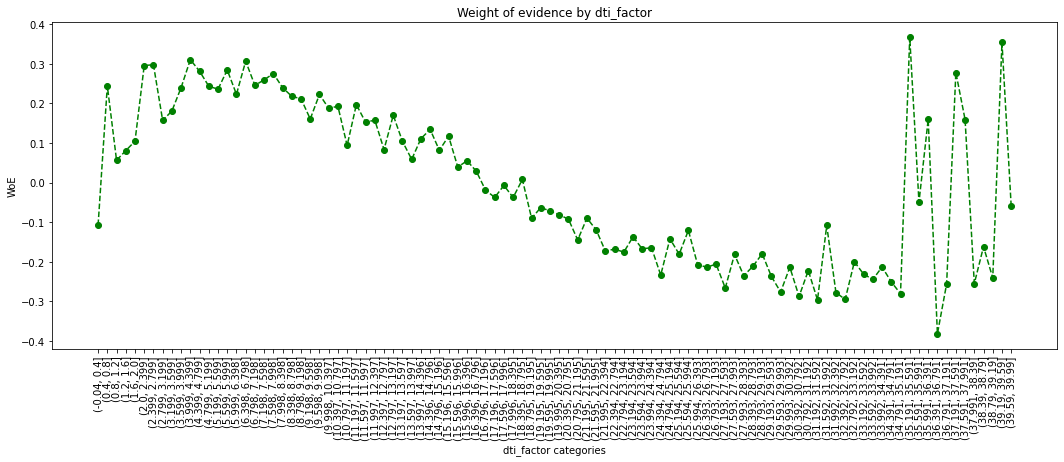

In [ ]:
plot_woe(df_temp, 90)

In [ ]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['dti'] <= 35, : ]

In [ ]:
df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)

df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'dti_factor', df_targets_prepr[df_inputs_prepr_temp.index])

display(df_temp)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.035, 0.7]",1694,0.892562,0.003661,1512.0,182.0,0.003669,0.003599,0.019150,NaN,NaN,0.027623
1,"(0.7, 1.4]",2057,0.894993,0.004446,1841.0,216.0,0.004467,0.004272,0.044753,0.002431,0.025604,0.027623
2,"(1.4, 2.1]",2522,0.909199,0.005451,2293.0,229.0,0.005564,0.004529,0.205862,0.014206,0.161109,0.027623
3,"(2.1, 2.8]",3201,0.913777,0.006918,2925.0,276.0,0.007097,0.005458,0.262617,0.004578,0.056755,0.027623
4,"(2.8, 3.5]",3946,0.907501,0.008528,3581.0,365.0,0.008689,0.007218,0.185468,0.006276,0.077149,0.027623
5,"(3.5, 4.2]",4814,0.913170,0.010404,4396.0,418.0,0.010667,0.008266,0.254937,0.005669,0.069469,0.027623
6,"(4.2, 4.9]",5735,0.913862,0.012395,5241.0,494.0,0.012717,0.009769,0.263700,0.000692,0.008763,0.027623
7,"(4.9, 5.6]",6682,0.912451,0.014442,6097.0,585.0,0.014794,0.011569,0.245908,0.001411,0.017792,0.027623
8,"(5.6, 6.3]",7418,0.912780,0.016032,6771.0,647.0,0.016429,0.012795,0.250025,0.000328,0.004117,0.027623
9,"(6.3, 7.0]",8204,0.914798,0.017731,7505.0,699.0,0.018210,0.013823,0.275642,0.002018,0.025616,0.027623


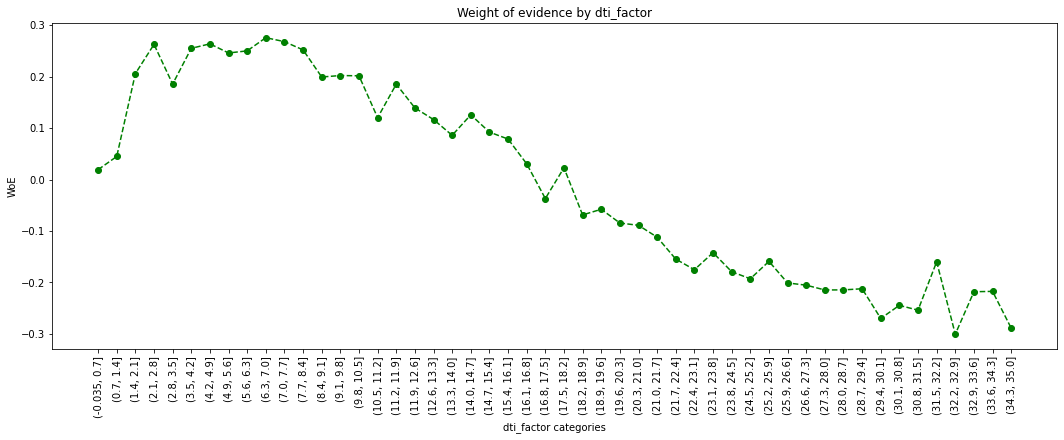

In [ ]:
plot_woe(df_temp, 90)

In [ ]:
# Categories:
df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti:22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

## 4.18 Months Since Last Record

In [ ]:
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
#sum(loan_data_temp['mths_since_last_record'].isnull())

# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)


df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,mths_since_last_record_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.129, 2.58]",1330,0.760150,0.021233,1011.0,319.0,0.018059,0.047941,-0.976344,NaN,NaN,inf
1,"(2.58, 5.16]",156,0.897436,0.002491,140.0,16.0,0.002501,0.002405,0.039206,0.137286,1.015550,inf
2,"(5.16, 7.74]",158,0.917722,0.002522,145.0,13.0,0.002590,0.001954,0.281937,0.020286,0.242731,inf
3,"(7.74, 10.32]",306,0.915033,0.004885,280.0,26.0,0.005001,0.003907,0.246845,0.002689,0.035091,inf
4,"(10.32, 12.9]",250,0.892000,0.003991,223.0,27.0,0.003983,0.004058,-0.018513,0.023033,0.265358,inf
5,"(12.9, 15.48]",387,0.906977,0.006178,351.0,36.0,0.006270,0.005410,0.147420,0.014977,0.165932,inf
6,"(15.48, 18.06]",419,0.909308,0.006689,381.0,38.0,0.006806,0.005711,0.175365,0.002331,0.027946,inf
7,"(18.06, 20.64]",308,0.931818,0.004917,287.0,21.0,0.005126,0.003156,0.485112,0.022510,0.309747,inf
8,"(20.64, 23.22]",552,0.907609,0.008813,501.0,51.0,0.008949,0.007665,0.154933,0.024209,0.330179,inf
9,"(23.22, 25.8]",400,0.905000,0.006386,362.0,38.0,0.006466,0.005711,0.124210,0.002609,0.030722,inf


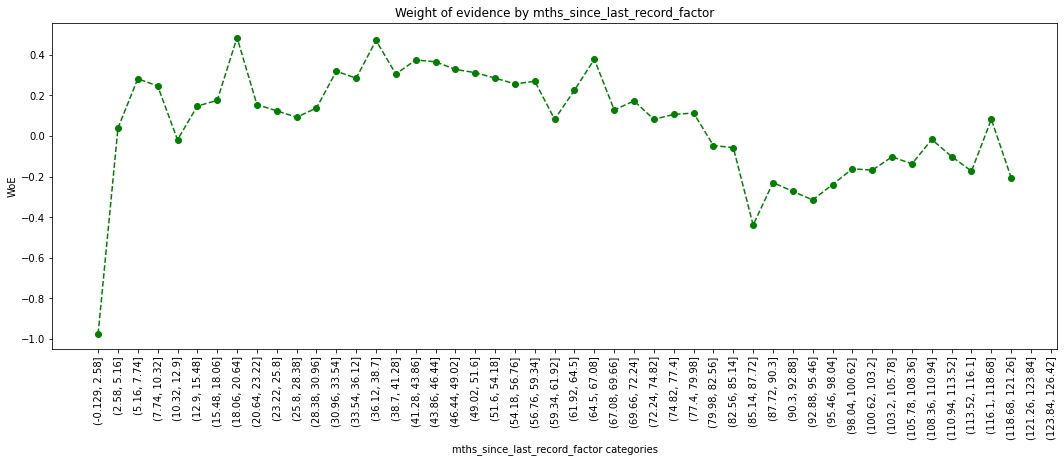

In [ ]:
plot_woe(df_temp, 90)

In [ ]:
# Categories: 'Missing', '0-2', '3-20', '21-31', '32-80', '81-86', '>86'
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record:>86'] = np.where((df_inputs_prepr['mths_since_last_record'] > 86), 1, 0)

# 5. Data Preparation 

In [ ]:
df_inputs_prepr.shape,df_targets_prepr.shape

((466285, 321), (466285,))

In [ ]:
df_inputs.to_csv('drive/MyDrive/Rakamin VIX Data Scientist/loan_data_defaults.csv')

In [ ]:
from sklearn.model_selection import train_test_split
# Takes a set of inputs and a set of targets as arguments. Splits the inputs and the targets into four dataframes:
X_train,X_test,y_train,y_test = train_test_split(df_inputs_prepr,df_targets_prepr,test_size=0.2,random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(373028, 321)
(93257, 321)


In [ ]:
path_train = path = 'drive/MyDrive/Rakamin VIX Data Scientist/loan_data_inputs_train.csv'
with open(path_train, 'w', encoding = 'utf-8-sig') as f:
  X_train.to_csv(f)

In [ ]:
path_train = path = 'drive/MyDrive/Rakamin VIX Data Scientist/loan_data_targets_train.csv'
with open(path_train, 'w', encoding = 'utf-8-sig') as f:
  y_train.to_csv(f)

In [ ]:
path_train = path = 'drive/MyDrive/Rakamin VIX Data Scientist/loan_data_inputs_test.csv'
with open(path_train, 'w', encoding = 'utf-8-sig') as f:
  X_test.to_csv(f)

In [ ]:
path_train = path = 'drive/MyDrive/Rakamin VIX Data Scientist/loan_data_targets_test.csv'
with open(path_train, 'w', encoding = 'utf-8-sig') as f:
  y_test.to_csv(f)